### Introdução ao Pandas

##### O Pandas é uma biblioteca Python usada para análise e manipulação de dados. Ele permite trabalhar com tabelas de dados estruturadas (DataFrames) de forma rápida e eficiente. Abaixo, veremos as funções principais e como usá-las em detalhes.

## Criando Estruturas de Dados Básicas
#### 1. Series
##### Uma Series é uma estrutura de dados unidimensional, como uma coluna de dados.

In [17]:
import pandas as pd
from IPython.display import display


data = [10, 20, 30, 40]
series = pd.Series(data, index=["a", "b", "c", "d"])
print(series)


a    10
b    20
c    30
d    40
dtype: int64


#### 2. DataFrame
##### Um DataFrame é uma estrutura bidimensional, como uma tabela de dados com linhas e colunas.

In [4]:
data = {
    "Nome": ["Alice", "Bob", "Charlie"],
    "Idade": [24, 30, 35],
    "Cidade": ["São Paulo", "Rio de Janeiro", "Belo Horizonte"]
}
df = pd.DataFrame(data)
print(df)


      Nome  Idade          Cidade
0    Alice     24       São Paulo
1      Bob     30  Rio de Janeiro
2  Charlie     35  Belo Horizonte


### Funções e Operações Principais
#### 3 Essas funções são úteis para inspecionar dados rapidamente.

##### head(): Mostra as primeiras linhas.
##### tail(): Mostra as últimas linhas.
##### info(): Exibe informações sobre o DataFrame.
##### describe(): Exibe estatísticas descritivas.

In [5]:
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())


      Nome  Idade          Cidade
0    Alice     24       São Paulo
1      Bob     30  Rio de Janeiro
2  Charlie     35  Belo Horizonte
      Nome  Idade          Cidade
0    Alice     24       São Paulo
1      Bob     30  Rio de Janeiro
2  Charlie     35  Belo Horizonte
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nome    3 non-null      object
 1   Idade   3 non-null      int64 
 2   Cidade  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes
None
           Idade
count   3.000000
mean   29.666667
std     5.507571
min    24.000000
25%    27.000000
50%    30.000000
75%    32.500000
max    35.000000


### Selecionando Colunas



In [6]:
print(df["Nome"])  # Seleciona uma coluna
print(df[["Nome", "Idade"]])  # Seleciona várias colunas


0      Alice
1        Bob
2    Charlie
Name: Nome, dtype: object
      Nome  Idade
0    Alice     24
1      Bob     30
2  Charlie     35


### Selecionando Linhas
#### iloc[]: Seleção por índice numérico.
#### loc[]: Seleção por rótulo ou condição.#

In [7]:
print(df.iloc[0])  # Primeira linha
print(df.loc[0:1])  # Linhas com rótulos de 0 a 1
print(df.loc[df["Idade"] > 25])  # Linhas onde a idade é maior que 25


Nome          Alice
Idade            24
Cidade    São Paulo
Name: 0, dtype: object
    Nome  Idade          Cidade
0  Alice     24       São Paulo
1    Bob     30  Rio de Janeiro
      Nome  Idade          Cidade
1      Bob     30  Rio de Janeiro
2  Charlie     35  Belo Horizonte


### Adicionando e Removendo Colunas
#### Adicionar uma coluna:

In [ ]:
df["Salário"] = [5000, 6000, 7000]
print(df)

# REMOVER COLUNA
df.drop("Salário", axis=1, inplace=True)
print(df)

#ADICIONAR LINHA 
df.loc[3] = ["David", 28, "Curitiba"]
print(df)

#REMMOVER LINHA
df.drop(3, axis=0, inplace=True)
print(df)


      Nome  Idade          Cidade  Salário
0    Alice     24       São Paulo     5000
1      Bob     30  Rio de Janeiro     6000
2  Charlie     35  Belo Horizonte     7000
      Nome  Idade          Cidade
0    Alice     24       São Paulo
1      Bob     30  Rio de Janeiro
2  Charlie     35  Belo Horizonte
      Nome  Idade          Cidade
0    Alice     24       São Paulo
1      Bob     30  Rio de Janeiro
2  Charlie     35  Belo Horizonte
3    David     28        Curitiba
      Nome  Idade          Cidade
0    Alice     24       São Paulo
1      Bob     30  Rio de Janeiro
2  Charlie     35  Belo Horizonte


### Manipulação de valores

In [ ]:
# SUBSTITUINDO VALORES 
df["Cidade"].replace("São Paulo", "SP", inplace=True)
print(df)


#ALTERANDO VALORES ESPECIFICOS
df.loc[0, "Idade"] = 25
print(df)



      Nome  Idade          Cidade
0    Alice     25              SP
1      Bob     30  Rio de Janeiro
2  Charlie     35  Belo Horizonte
      Nome  Idade          Cidade
0    Alice     25              SP
1      Bob     30  Rio de Janeiro
2  Charlie     35  Belo Horizonte


C:\Users\danme\AppData\Local\Temp\ipykernel_3588\3822234813.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cidade"].replace("São Paulo", "SP", inplace=True)


### Lidando com valores nulos

#### isnull(): Verifica valores nulos.
#### fillna(): Preenche valores nulos.
#### dropna(): Remove linhas ou colunas com valores nulos.

In [14]:
print(df.isnull())
df.fillna(0, inplace=True)
df.dropna(axis=0, inplace=True)
print(df)


    Nome  Idade  Cidade
0  False  False   False
1  False  False   False
2  False  False   False
      Nome  Idade          Cidade
0    Alice     25              SP
1      Bob     30  Rio de Janeiro
2  Charlie     35  Belo Horizonte


#### groupby(): Agrupa os dados com base em uma coluna e permite aplicar funções agregadas.
#### agg(): Aplica múltiplas funções agregadas.
#### merge(): Mescla dois DataFrames com base em uma coluna.
#### concat(): Concatena DataFrames vertical ou horizontalmente.


In [15]:
# Exemplo de agrupamento
data = {
    "Produto": ["A", "A", "B", "B"],
    "Vendas": [100, 200, 150, 300]
}
df = pd.DataFrame(data)
agrupado = df.groupby("Produto").sum()
print(agrupado)


         Vendas
Produto        
A           300
B           450


In [16]:
# Exemplo de merge
df1 = pd.DataFrame({"ID": [1, 2], "Nome": ["Alice", "Bob"]})
df2 = pd.DataFrame({"ID": [1, 2], "Salário": [5000, 6000]})
df_merged = pd.merge(df1, df2, on="ID")
print(df_merged)

# Exemplo de concat
df_concat = pd.concat([df1, df2], axis=1)
print(df_concat)


   ID   Nome  Salário
0   1  Alice     5000
1   2    Bob     6000
   ID   Nome  ID  Salário
0   1  Alice   1     5000
1   2    Bob   2     6000


In [19]:
display(df)

# Exemplo de DataFrame estilizado
df.style.highlight_max(color="lightgreen").highlight_min(color="pink")


,Produto,Vendas
0,A,100
1,A,200
2,B,150
3,B,300


,Produto,Vendas
0,A,100
1,A,200
2,B,150
3,B,300


In [20]:
df.head(10)  # Exibe as primeiras 10 linhas
df.tail(10)  # Exibe as últimas 10 linhas


,Produto,Vendas
0,A,100
1,A,200
2,B,150
3,B,300


In [21]:
# Configurações para mostrar mais linhas e colunas
pd.set_option("display.max_rows", 20)    # Número máximo de linhas a serem exibidas
pd.set_option("display.max_columns", 10) # Número máximo de colunas a serem exibidas

# Visualizar o DataFrame completo (ou quase completo)
df


,Produto,Vendas
0,A,100
1,A,200
2,B,150
3,B,300


<Axes: title={'center': 'Idades'}>

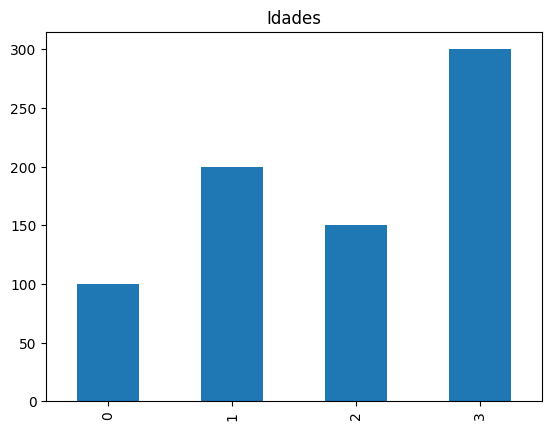

In [25]:
# Exemplo de gráfico de barras
df["Vendas"].plot(kind="bar", title="Idades")
